# FINAL PROJECT REPORT

## Table of content

1. Load Data
2. Data Exploration
3. Data Preprocessing
4. Feature Encoding
5. Model Building
    - Naive Bayes Gaussian
    - Support Vector Machine
    - Decision Tree Classifier
    - Gradient Boosting Classifier
    - Extreme Gradient Boosting Classifier
    - Light Gradient Boosting Classifier
    - Random Forest Classifier
    - Extra Tree Classifier
6. Model Comparison

In [156]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import nan
from numpy import isnan
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load the dataset

In [157]:
# Load the dataset
ckd_data = pd.read_csv("C:\\Users\\Samuel\\Desktop\\FYP\\FYP\\kidney_disease.csv")

## Data Exploration

In [158]:
# Display first 5 rows
ckd_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [159]:
# Display dataset dimension
ckd_data.shape

(400, 26)

In [160]:
# Display information on dataset
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [161]:
# Remove the id column
ckd_data.drop('id', axis = 1, inplace = True)

In [162]:
# Rename column names into readable names
ckd_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 
                    'sugar', 'red_blood_cells', 'pus_cell', 
                    'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 
                    'blood_urea', 'serum_creatinine', 'sodium','potassium', 
                    'haemoglobin', 'packed_cell_volume', 
                    'white_blood_cell_count', 'red_blood_cell_count', 
                    'hypertension', 'diabetes_mellitus', 
                    'coronary_artery_disease', 'appetite', 
                    'peda_edema', 'anemia', 'class']

In [163]:
# Display first 5 rows
ckd_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [164]:
# Display information on dataset
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

From the information above, ID has been removed and,
>- #15 - packed_cell_volume
>- #16 - white_blood_cell_count
>- #17 - red_blood_cell_count

seems to have been identified as object, we will have to change it to the numerical Dtype.

In [165]:
# Handle potential commas 
ckd_data['white_blood_cell_count'] = ckd_data['white_blood_cell_count'].str.replace(',', '')

# Convert using pd.to_numeric
ckd_data['packed_cell_volume'] = pd.to_numeric(ckd_data['packed_cell_volume'], errors='coerce')
ckd_data['white_blood_cell_count'] = pd.to_numeric(ckd_data['white_blood_cell_count'], errors='coerce')
ckd_data['red_blood_cell_count'] = pd.to_numeric(ckd_data['red_blood_cell_count'], errors='coerce')

In [166]:
# Display information on dataset
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

From the information above,

>- #15 - packed_cell_volume
>- #16 - white_blood_cell_count
>- #17 - red_blood_cell_count

has been resolved.

## Data Preprocessing

In [167]:
# Display first 5 rows
ckd_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [168]:
# Separate the numerical and categorical columns 
num_cols = ckd_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = ckd_data.select_dtypes(include=['object']).columns

In [169]:
# Analyze where are the missing values
ckd_data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [170]:
# Analyze where are the missing values by numerical
ckd_data[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [171]:
# Analyze where are the missing values by categorical 
ckd_data[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [172]:
# Mean Imputation for Numerical Columns
imputer_mean = SimpleImputer(strategy='mean')
ckd_data[num_cols] = imputer_mean.fit_transform(ckd_data[num_cols])

# Mode Imputation (Highest Frequency) for Categorical Columns
imputer_mode = SimpleImputer(strategy='most_frequent')
ckd_data[cat_cols] = imputer_mode.fit_transform(ckd_data[cat_cols])

In [173]:
# Analyze where are the missing values
ckd_data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [174]:
# Analyze where are the missing values
ckd_data[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [175]:
# Display first 5 rows
ckd_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


Missing data has been resolved.

Next, analyze the uniques values in categorical columns

In [176]:
# Display summary of each categorical column
for col in cat_cols:
    print(f"{col} has {ckd_data[col].unique()} values\n")

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes'] values

coronary_artery_disease has ['no' 'yes' '\tno'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

anemia has ['no' 'yes'] values

class has ['ckd' 'ckd\t' 'notckd'] values



From the information above, there seems to be some uncertainty in,
> - diabetes_mellitus
> - coronary_artery_disease
> - class

In [177]:
# Display the uncertain columns
print(f"diabetes_mellitus :- {ckd_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {ckd_data['coronary_artery_disease'].unique()}")
print(f"class :- {ckd_data['class'].unique()}")

diabetes_mellitus :- ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease :- ['no' 'yes' '\tno']
class :- ['ckd' 'ckd\t' 'notckd']


Lets resolve the uncertainty.

In [178]:
# Resolve uncertainty
ckd_data['diabetes_mellitus'] = ckd_data['diabetes_mellitus'].replace(to_replace = {' yes':'yes', '\tno':'no', '\tyes':'yes'})
ckd_data['coronary_artery_disease'] = ckd_data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
ckd_data['class'] = ckd_data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [179]:
# Display the uncertain columns
print(f"diabetes_mellitus :- {ckd_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {ckd_data['coronary_artery_disease'].unique()}")
print(f"class :- {ckd_data['class'].unique()}")

diabetes_mellitus :- ['yes' 'no']
coronary_artery_disease :- ['no' 'yes']
class :- ['ckd' 'not ckd']


The uncertainty has been resolved.

In [180]:
# Display information on dataset
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

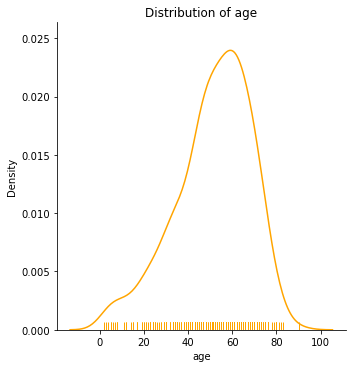

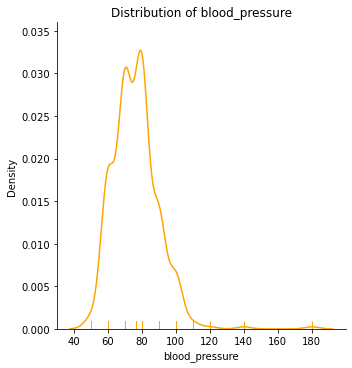

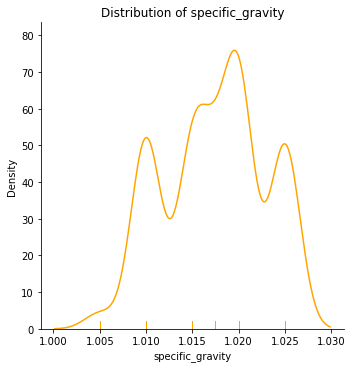

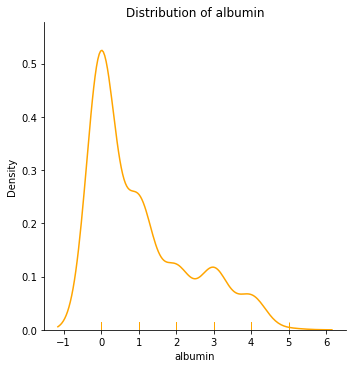

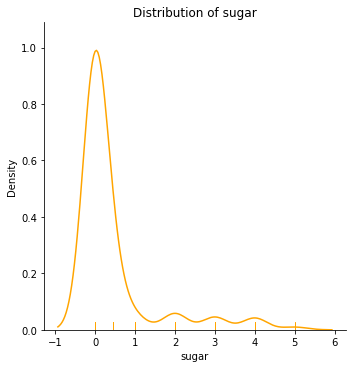

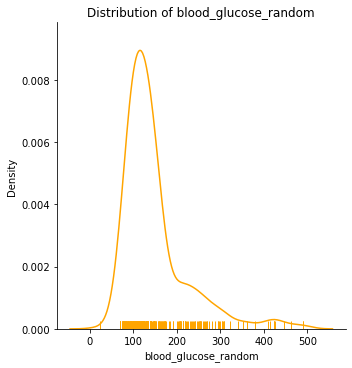

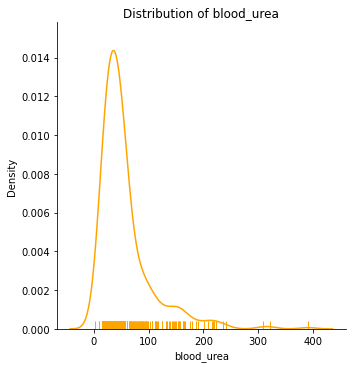

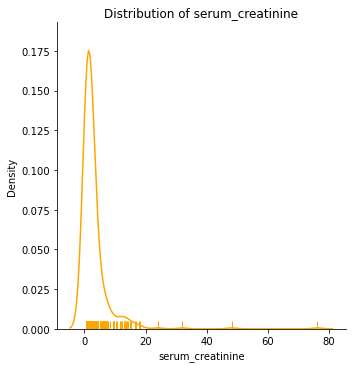

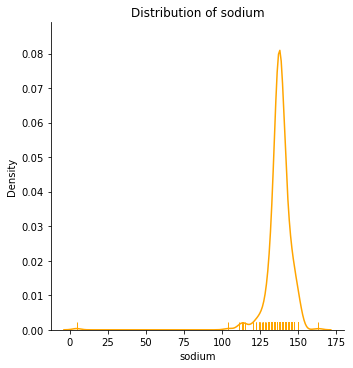

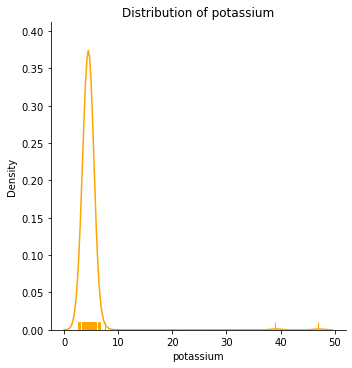

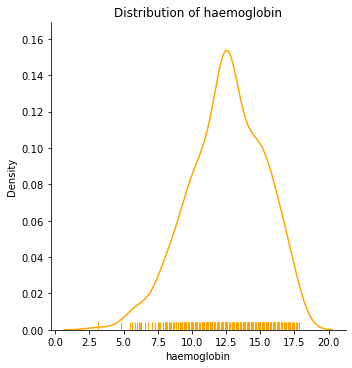

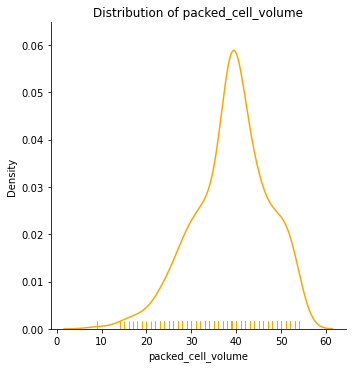

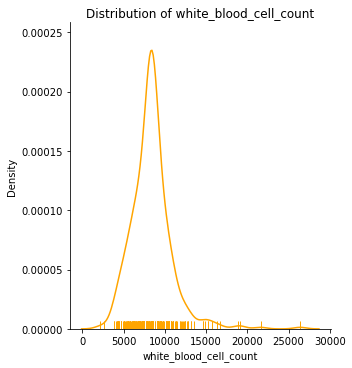

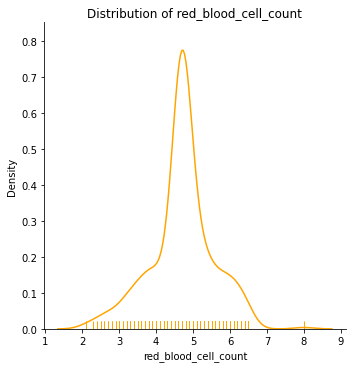

In [181]:
# Visualizing Numerical Features for any Outliers 
numerical_cols = ckd_data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    sns.displot(ckd_data, x=col, kind='kde', color= 'orange', rug=True)
    plt.title(f'Distribution of {col}')
    plt.show()

from the information above, no sightings of unusual long tails, but some level of skewness is present.

## Feature Encoding

to change the categorical values of the relevant features into numerical ones.

In [182]:
# Display information on dataset
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [183]:
# Diplay information 
ckd_data[['red_blood_cells', 'pus_cell', 'anemia', 'class']].head(10) 

,red_blood_cells,pus_cell,anemia,class
0,normal,normal,no,ckd
1,normal,normal,no,ckd
2,normal,normal,yes,ckd
3,normal,abnormal,yes,ckd
4,normal,normal,no,ckd
5,normal,normal,no,ckd
6,normal,normal,no,ckd
7,normal,abnormal,no,ckd
8,normal,abnormal,yes,ckd
9,abnormal,abnormal,yes,ckd


As each categorical columns has 2 categories, here we can use label encoder

In [184]:
# Encoding categorical columns using LabelEncoder
columns_to_encode = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 
                     'bacteria', 'hypertension', 'diabetes_mellitus',
                     'coronary_artery_disease', 'appetite', 
                     'appetite', 'peda_edema', 'anemia', 'class']  # Adjust the column names

encoder = LabelEncoder()
for col in columns_to_encode:
    ckd_data[col] = encoder.fit_transform(ckd_data[col])

In [185]:
# Display information on dataset
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [186]:
# Display first 5 rows
ckd_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


## Model building

In [187]:
# Separate features from target variable
x_col = [col for col in ckd_data.columns if col != 'class']
y_col = 'class'

X = ckd_data[x_col]
y = ckd_data[y_col]

# splitting data intp training and test set, training:test, 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(f"'X' shape: {X_train.shape}") #70% train
print(f"'y' shape: {X_test.shape}")  #30% test

'X' shape: (280, 24)
'y' shape: (120, 24)


## Naive bayes Gaussian Classifier

In [188]:
# Instantiate and train
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make prediction using the trained model
y_pred = gnb_model.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(y_train, gnb_model.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes: {gnb_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of Gaussian Naive Bayes is 0.9607142857142857
Test Accuracy of Gaussian Naive Bayes: 0.9333333333333333 

Confusion Matrix :- 
[[68  4]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.92      0.92      0.92        48

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



## Support Vector Machine Classifier

In [189]:
# Instantiate and train
svm_model = SVC(kernel='linear')  # Start with a linear kernel
svm_model.fit(X_train, y_train)

# Make prediction using the trained model
y_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of SVM is {accuracy_score(y_train, svm_model.predict(X_train))}")
print(f"Test Accuracy of SVM is {svm_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of SVM is 0.9785714285714285
Test Accuracy of SVM is 0.9583333333333334 

Confusion Matrix :- 
[[67  5]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        72
           1       0.91      1.00      0.95        48

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



## Decision Tree Classifier

In [201]:
# Instantiate and train
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

# Make prediction using the trained model
y_pred = dtc_model.predict(X_test) 
dtc_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc_model.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9333333333333333 

Confusion Matrix :- 
[[67  5]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.90      0.94      0.92        48

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [214]:
# Hyper-Parameter tuning
param_grid = {
    'max_depth': [None, 3, 5, 8, 10],
    'min_samples_split': [1, 2, 3, 5, 8], 
    'min_samples_leaf' : [1, 2, 3, 5, 8],
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

# Perform Grid Search 
grid_search_dtc_model = GridSearchCV(dtc_model, param_grid, cv=5, n_jobs = -1, verbose = 1) 
grid_search_dtc_model.fit(X_train, y_train)

# Display Best result
print('\n',grid_search_dtc_model.best_params_)
print('\n',grid_search_dtc_model.best_score_)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits

 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}

 0.9821428571428571


In [215]:
# Best estimator
dtc_model = grid_search_dtc_model.best_estimator_

# Make prediction using the trained model
y_pred = dtc_model.predict(X_test) 
dtc_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc_model.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of Decision Tree Classifier is 0.9714285714285714
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[72  0]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



# Gradient Boosting Classifier

In [216]:
# Instantiate and train
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Make prediction using the trained model
y_pred = gbc_model.predict(X_test) 
gbc_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Grdient Boosting Classifier is {accuracy_score(y_train, gbc_model.predict(X_train))}")
print(f"Test Accuracy of Grdient Boosting Classifier is {gbc_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of Grdient Boosting Classifier is 1.0
Test Accuracy of Grdient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[71  1]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## EXtreme Gradient Boosting (XGBoost) Classifier

In [194]:
# Instantiate and train
xgbc_model = xgb.XGBClassifier() 
xgbc_model.fit(X_train, y_train) 

# Make predictions using the trained model
y_pred = xgbc_model.predict(X_test)
xgbc_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, xgbc_model.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {xgbc_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## Light Gradient Boosting Machine (LightGBM) Classifier

In [218]:
# Instantiate and train
lgb_model = lgb.LGBMClassifier()  
lgb_model.fit(X_train, y_train)   

# Make predictions using the trained model
y_pred = lgb_model.predict(X_test)
lgb_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of LightGBM Classifier is {accuracy_score(y_train, lgb_model.predict(X_train))}")
print(f"Test Accuracy of LightGBM Classifier is {lgb_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

## Random Forest Classifier

In [239]:
# Instantiate and train
rfc_model = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc_model.fit(X_train, y_train)

# Make prediction using the trained model
y_pred = rfc_model.predict(X_test) 
rfc_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rfc_model.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rfc_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## Extra Trees Classifier

In [240]:
# Instantiate and train
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)

# Make prediction using the trained model
y_pred = etc_model.predict(X_test) 
etc_acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Training Accuracy of Extra Tree Classifier is {accuracy_score(y_train, etc_model.predict(X_train))}")
print(f"Test Accuracy of Extra Tree Classifier is {etc_acc} \n")

# Display the confusion matrix and classification report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of Extra Tree Classifier is 1.0
Test Accuracy of Extra Tree Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Model Comparison

In [241]:
# Model dataframe
models = pd.DataFrame({
    'Model' : [ 'Naive Bayes Gaussian', 'Support Vector Machine Classifier', 
               'Decision Tree Classifier', 'Gradient Boosting Classifier',
               'Extreme Gradient Boosting Classifier', 'Light Gradient Boosting Machine Classifier',
               'Random Forest Classifier', 'Extra Trees Classifier'],
    
    'Score' : [ gnb_acc, svm_acc, dtc_acc, gbc_acc, xgbc_acc, lgb_acc, rfc_acc, etc_acc ]
})

# Sort by descending order
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Light Gradient Boosting Machine Classifier,1.000000
7,Extra Trees Classifier,1.000000
4,Extreme Gradient Boosting Classifier,0.991667
6,Random Forest Classifier,0.991667
3,Gradient Boosting Classifier,0.975000
1,Support Vector Machine Classifier,0.958333
2,Decision Tree Classifier,0.958333
0,Naive Bayes Gaussian,0.933333


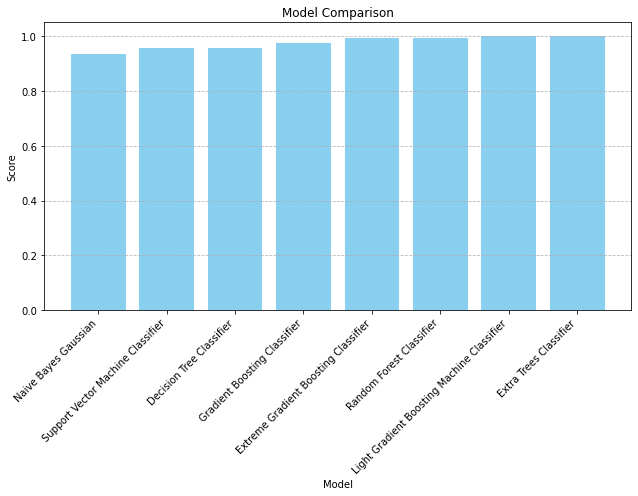

In [242]:
# Model dataframe
models = pd.DataFrame({
    'Model' : [ 'Naive Bayes Gaussian', 'Support Vector Machine Classifier', 
               'Decision Tree Classifier', 'Gradient Boosting Classifier',
               'Extreme Gradient Boosting Classifier', 'Light Gradient Boosting Machine Classifier',
               'Random Forest Classifier', 'Extra Trees Classifier'],
    
    'Score' : [ gnb_acc, svm_acc, dtc_acc, gbc_acc, xgbc_acc, lgb_acc, rfc_acc, etc_acc ]
})

# Sort models by score in ascending order
models_sorted = models.sort_values(by='Score', ascending=True)

# Create and display bar chart
plt.figure(figsize=(9, 7))
plt.bar(models_sorted['Model'], models_sorted['Score'], color='#89CFF0')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.9)


plt.tight_layout()
plt.show()

## Visualization plots

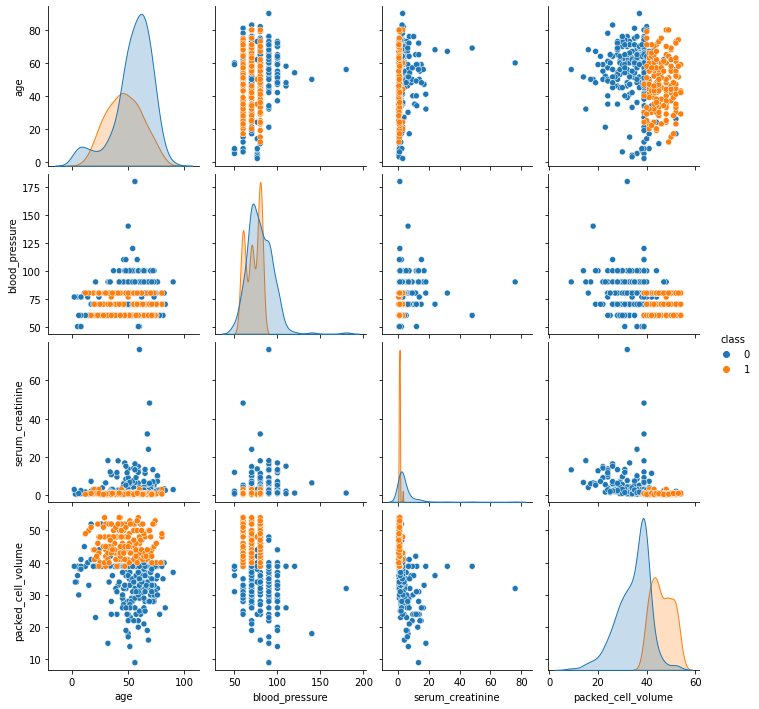

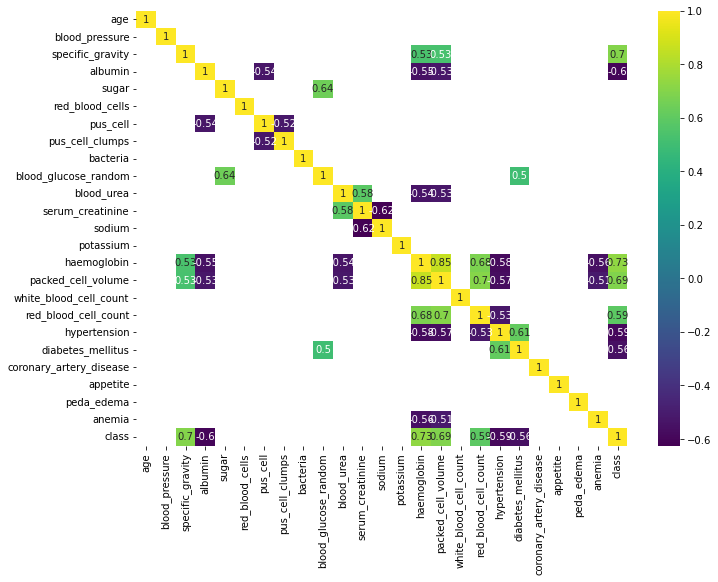

In [243]:
# Recap 
# 0 = no
# 1 = yes 
# Blue = CKD
# Orange = NO CKD
# Selective Pairplot 
sns.pairplot(ckd_data[["age",'blood_pressure','serum_creatinine' ,'packed_cell_volume', 'class']], hue='class', diag_kind='kde') 
plt.show()  # Display the plot

# Filtered Correlation Matrix 
corr_matrix = ckd_data.corr()
high_corrs = corr_matrix[abs(corr_matrix) > 0.5]

plt.figure(figsize=(11, 8))
sns.heatmap(high_corrs, annot=True, cmap='viridis')  
plt.show() 